<a href="https://colab.research.google.com/github/cihankaradogan/Turkey-Coronavirus-Visualization-and-Time-Series-Forecasting-Using-Prophet/blob/master/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [296]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import fbprophet # Necessary for forecasting.

# Reading Dataset and Adding Some Necessary Columns

In [297]:
df = pd.read_csv('/content/drive/My Drive/tr/Covid19-Turkey.csv')

,Date,Daily Cases,Total Cases,Total Deaths,Total Recovered,Active Cases,Daily Test Cases,Total Intensive Care,Intubated Cases,Case incrase rate %,Daily(Cases/Test) %,(Recovered / Active Cases) %,(Death / Active Cases) %,(Active Cases / Population) %,Number Of Days
0,3/11/2020,1,1,0,0,1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.000001,1
1,3/12/2020,0,1,0,0,1,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.000001,2
2,3/13/2020,4,5,0,0,5,NaN,NaN,NaN,400.0,NaN,0.0,0.0,0.000006,3
3,3/14/2020,1,6,0,0,6,NaN,NaN,NaN,20.0,NaN,0.0,0.0,0.000007,4
4,3/15/2020,12,18,0,0,18,NaN,NaN,NaN,200.0,NaN,0.0,0.0,0.000021,5


In [ ]:
#Adding number of days column.
number_of_days = pd.DataFrame(np.arange(1,len(df.Date)+1,1))
a = {"Number Of Days": number_of_days.values}
df = df.assign(**a)
df.head()

In [301]:
#Adding daily deaths column.
yesterday_deaths = 0
Daily_deaths = []
for current_deaths in df['Total Deaths']:
    if current_deaths>yesterday_deaths:
        Daily_deaths.append(current_deaths-yesterday_deaths)
    else :
        Daily_deaths.append(0)
    yesterday_deaths = current_deaths
Daily_deaths=pd.DataFrame(Daily_deaths)
df['Daily Deaths'] = Daily_deaths

In [304]:
#Adding daily recovered column.
yesterday_recovered = 0
Daily_recovered = []
for current_recovered in df['Total Recovered']:
    if current_recovered>yesterday_recovered:
        Daily_recovered.append(current_recovered-yesterday_recovered)
    else :
        Daily_recovered.append(0)
    yesterday_recovered = current_recovered
Daily_recovered=pd.DataFrame(Daily_recovered)
df['Daily Recovered'] = Daily_recovered

# Visualization

**Total Cases by Days**

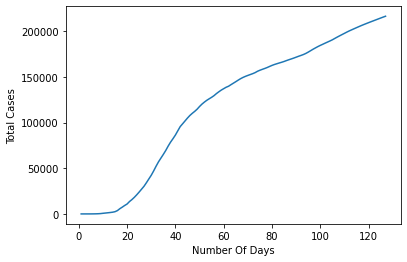

In [298]:
sns.lineplot(x="Number Of Days", y="Total Cases", data = df)

**Daily Cases by Days**

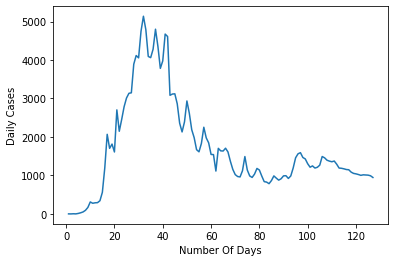

In [299]:
sns.lineplot(x="Number Of Days", y="Daily Cases", data = df)

**Total Deaths by Days**

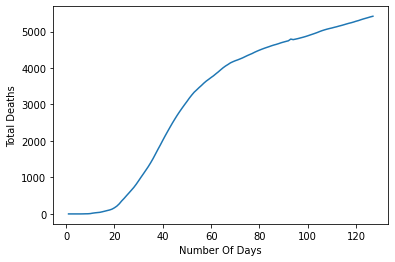

In [307]:
sns.lineplot(x="Number Of Days", y="Total Deaths", data = df)

**Daily Deaths by Days**

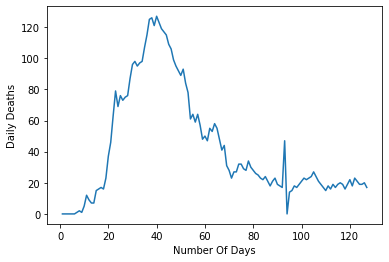

In [302]:
sns.lineplot(x="Number Of Days", y="Daily Deaths", data = df)

**Total Test Cases and Daily Cases by Days**

Text(0, 0.5, 'Value')

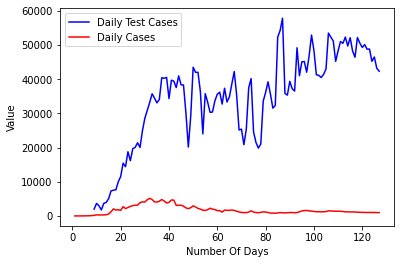

In [303]:
plt.plot(df['Number Of Days'],df['Daily Test Cases'],color ='blue',label ='Daily Test Cases')
plt.plot(df['Number Of Days'],df['Daily Cases'],color ='red',label='Daily Cases')
plt.legend()
plt.xlabel('Number Of Days')
plt.ylabel('Value')

**Total Cases, Daily Case, and Daily Recovered by Days**

Text(0, 0.5, 'Value')

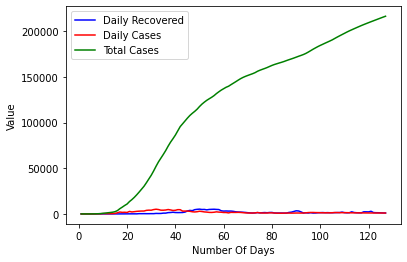

In [305]:
plt.plot(df['Number Of Days'],df['Daily Recovered'],color ='blue',label ='Daily Recovered')
plt.plot(df['Number Of Days'],df['Daily Cases'],color ='red',label='Daily Cases')
plt.plot(df['Number Of Days'],df['Total Cases'],color ='green',label ='Total Cases')
plt.legend()
plt.xlabel('Number Of Days')
plt.ylabel('Value')

# Forecasting

**Making Some New DataFrames from Dataset for Forecasting**

In [306]:
tc=df['Total Cases']
nod=df['Number Of Days']
date = df["Date"]
date = date.str.replace("/","-")
tc_nod = pd.DataFrame({"Total Cases": tc,"Date": date})
td=df['Total Deaths']
td_nod = pd.DataFrame({"Total Deaths": td,"Date": date})
tr=df['Total Recovered']
tr_nod = pd.DataFrame({"Total Recovered": tr,"Date": date})
dc=df['Daily Cases']
dc=pd.DataFrame({"Daily Cases": dc,"Date": date})

**Total Cases Forecasting**

In [271]:
tc_nod = tc_nod.rename(columns={'Date': 'ds', 'Total Cases': 'y'})
fbp1 = fbprophet.Prophet()
fbp1.fit(tc_nod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [272]:
future1 = fbp1.make_future_dataframe(periods=30,freq="M")
future1.tail()

,ds
152,2022-08-31
153,2022-09-30
154,2022-10-31
155,2022-11-30
156,2022-12-31


In [273]:
forecast1 = fbp.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2022-08-31,1.154144e+06,-2.525314e+06,4.836726e+06
153,2022-09-30,1.190459e+06,-2.700569e+06,5.046211e+06
154,2022-10-31,1.227637e+06,-2.919929e+06,5.292386e+06
155,2022-11-30,1.263833e+06,-3.144067e+06,5.582620e+06
156,2022-12-31,1.301385e+06,-3.394606e+06,5.921491e+06


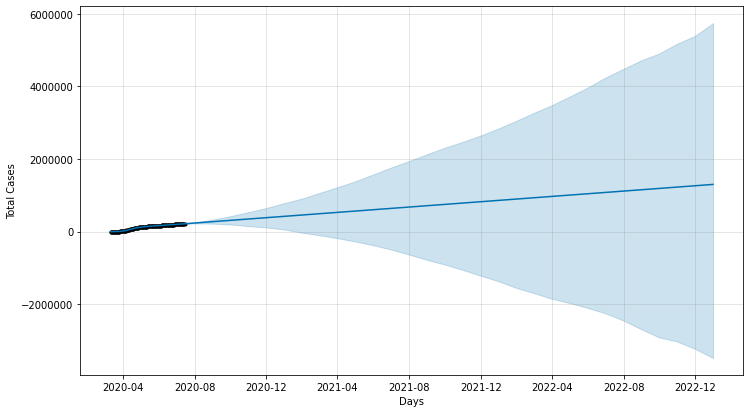

In [274]:
fig1 = fbp.plot(forecast)
plt.xlabel('Days')
plt.ylabel('Total Cases')
plt.ticklabel_format(style='plain', axis='y')

**Total Deaths Forecasting**

In [275]:
td_nod = td_nod.rename(columns={'Date': 'ds', 'Total Deaths': 'y'})
fbp2 = fbprophet.Prophet()
fbp2.fit(td_nod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [276]:
future2 = fbp2.make_future_dataframe(periods=30,freq="M")
future2.tail()

,ds
152,2022-08-31
153,2022-09-30
154,2022-10-31
155,2022-11-30
156,2022-12-31


In [277]:
forecast2 = fbp2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2022-08-31,20529.638000,-92457.497302,127317.044415
153,2022-09-30,21114.584207,-96912.132539,134720.080526
154,2022-10-31,21714.858128,-101485.971932,141524.238713
155,2022-11-30,22299.144179,-107122.201487,148564.696992
156,2022-12-31,22902.670195,-112019.518486,155664.012300


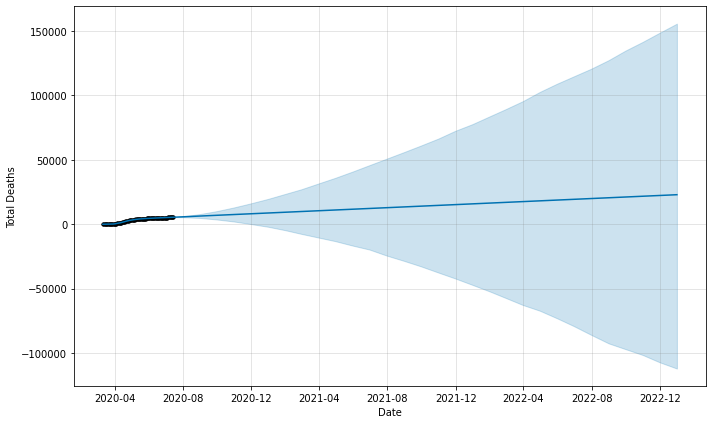

In [283]:
fig2 = fbp2.plot(forecast2)
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.ticklabel_format(style='plain', axis='y')

**Total Recovered Forecasting**

In [280]:
tr_nod = tr_nod.rename(columns={'Date': 'ds', 'Total Recovered': 'y'})
fbp3 = fbprophet.Prophet()
fbp3.fit(tr_nod)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [281]:
future3 = fbp3.make_future_dataframe(periods=30,freq="M")
future3.tail()

,ds
152,2022-08-31
153,2022-09-30
154,2022-10-31
155,2022-11-30
156,2022-12-31


In [282]:
forecast3 = fbp3.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
152,2022-08-31,1.445101e+06,-2.949104e+06,5.898846e+06
153,2022-09-30,1.493332e+06,-3.221077e+06,6.239675e+06
154,2022-10-31,1.542891e+06,-3.458359e+06,6.519416e+06
155,2022-11-30,1.591118e+06,-3.641508e+06,6.807501e+06
156,2022-12-31,1.640856e+06,-3.799573e+06,7.137386e+06


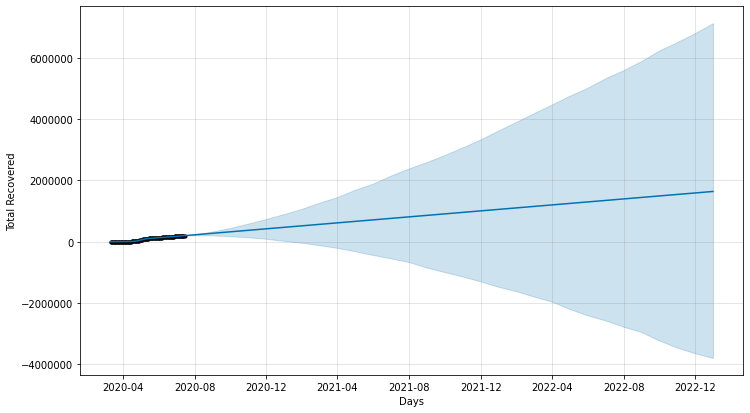

In [284]:
fig3 = fbp3.plot(forecast3)
plt.xlabel('Days')
plt.ylabel('Total Recovered')
plt.ticklabel_format(style='plain', axis='y')

**Daily Cases Forecasting**

In [285]:
dc = dc.rename(columns={'Date': 'ds', 'Daily Cases': 'y'})
fbp4 = fbprophet.Prophet()
fbp4.fit(dc)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [286]:
future4 = fbp4.make_future_dataframe(periods=100,freq="D")
future4.tail()

,ds
222,2020-10-19
223,2020-10-20
224,2020-10-21
225,2020-10-22
226,2020-10-23


In [287]:
forecast4 = fbp4.predict(future4)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
222,2020-10-19,-219.343663,-1592.429746,1194.283754
223,2020-10-20,-88.111392,-1513.515826,1337.656707
224,2020-10-21,-214.439340,-1678.626639,1284.219549
225,2020-10-22,-159.790857,-1598.614587,1351.498366
226,2020-10-23,-99.881812,-1498.801063,1349.110494


Text(45.5, 0.5, 'Daily Cases')

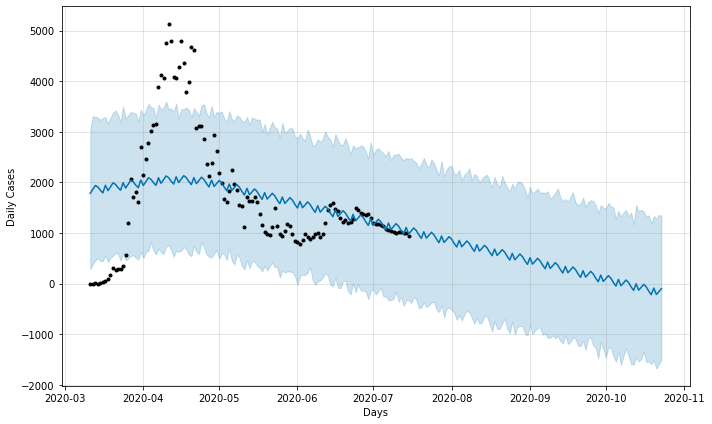

In [309]:
fig4 = fbp4.plot(forecast4)
plt.xlabel('Days')
plt.ylabel('Daily Cases')